# 🔎 Análisis Exploratorio de Datos (Google):

## Importación de librerias

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from data_utils import data_type_check

### Importación de los datasets

In [2]:
df_metadata = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_metadata_FL.parquet', engine='pyarrow')
df_review = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_review_FL_reducido.parquet', engine='pyarrow')

### Funciones importantes

In [3]:
# FUNCION PARA ENCONTRAR OUTLIERS CON EL RANGO INTERCUARTILICO
def encontrar_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [4]:
# FUNCION PARA ENCONTRAR OUTLIERS CON LA REGLA DE LAS 3 SIGMAS
def encontrar_outliers_3sigmas(data):
    mean = data.mean()
    std = data.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return data[(data < lower_bound) | (data > upper_bound)]

In [5]:
# FUNCION PARA ENCONTRAR EL RANGO MINIMO Y MAXIMO DEL IQR
def calculate_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return float(lower_bound), float(upper_bound)

## EDA

Verificación de los datos

In [6]:
df_metadata.head(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
1302883,Neurocare & Family Services,"Neurocare & Family Services, 1749 S Naperville...",0x880e55ddb0081907:0x1dc5f1650b07c388,None,41.839291,-88.100503,[Doctor],5.0,1,None,"[[Monday, Closed], [Tuesday, 8AM–10PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Tue,"[0x880e55ddba9f7635:0x862c597b017011c1, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
749243,Bayview Canvas,"Bayview Canvas, 22460 Glass Ln, Port Charlotte...",0x146c6dea0e8465f9:0xca5e7f14cefd4983,None,26.962494,-82.075552,[Upholstery shop],5.0,1,None,"[[Friday, 8AM–5PM], [Saturday, Closed], [Sunda...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x88dca9b000000001:0xae92d5429c06878a, 0x88db...",https://www.google.com/maps/place//data=!4m2!3...
2190487,Peluquería Acapulco Barbershop,"Peluquería Acapulco Barbershop, 1014 Gault Ave...",0x8861d6398caaf079:0x7a735e53dfeac495,None,34.450636,-85.714130,[Barber shop],4.8,58,None,"[[Saturday, 10AM–5PM], [Sunday, Closed], [Mond...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM,"[0x8861d640f8cf4415:0xc50ef1793d0439da, 0x8861...",https://www.google.com/maps/place//data=!4m2!3...
1932075,Mountain Travelers Hike and Ski Shop,"Mountain Travelers Hike and Ski Shop, 147 US-4...",0x89e024365cd93733:0x97f767d0409e00af,None,43.622089,-72.953674,"[Ski shop, Camping store, Car accessories store]",4.4,26,None,"[[Thursday, 10AM–5PM], [Friday, 10AM–5PM], [Sa...",None,Permanently closed,"[0x89e024ecbaaafc07:0xf913f5e468d2db08, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
489691,Lovely Nails,"Lovely Nails, 636 Brandon Ave SW, Roanoke, VA ...",0x884d0da7e0e9de07:0xfaeb98dff1ad0e89,None,37.254535,-79.959470,[Nail salon],4.3,145,None,"[[Monday, 9:30AM–7:30PM], [Tuesday, 9:30AM–7:3...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9:30AM Tue,"[0x884d0cff3546c2e1:0xf91b9ff679bd14aa, 0x884d...",https://www.google.com/maps/place//data=!4m2!3...


In [7]:
df_metadata.price.value_counts()

price
$       8785
$$      7503
$$$      558
$$$$      60
Name: count, dtype: int64

In [8]:
df_review.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
762395,1.145803e+20,jose martinez,1525385005812,5,(Translated by Google) Excellent service ... a...,None,None,0x88d9b684949c6fa1:0x5da9b5c4bd240d6b
924820,1.077641e+20,Ian Horow,1619985567951,5,None,None,None,0x88d901c07a850b25:0x53258790576101e6
1765663,1.003756e+20,Lauren Palmer,1605046404419,5,I was really impressed with the service we rec...,None,None,0x8890c53f737b08dd:0x9b2fc3221b8c1fff
2393358,1.102839e+20,Merrilee Crank,1527010637476,5,Clean very nice people work here I've been to ...,None,None,0x88e7c6dcd2e0a14d:0xb3b8214e70fb8540
1683593,1.156291e+20,Sincere Dread,1564086971867,5,None,None,None,0x88c2e3863fb052d5:0xc7dd0c27ad588473


Eliminación de columnas innecesarias

In [9]:
df_metadata.drop(columns=['relative_results','url'],inplace=True)

### 1. Información y transformación de los datos

#### Análisis de nulos

In [10]:
print(data_type_check(df_metadata))
print(data_type_check(df_review))


 Resumen del dataframe:

Dimensiones:  (220001, 13)
           columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0             name      100.00     0.00            5    object
1          address       97.15     2.85         6275    object
2          gmap_id      100.00     0.00            0    object
3      description        7.16    92.84       204255    object
4         latitude      100.00     0.00            0   float64
5        longitude      100.00     0.00            0   float64
6         category       99.35     0.65         1428    object
7       avg_rating      100.00     0.00            0   float64
8   num_of_reviews      100.00     0.00            0     int64
9            price        7.68    92.32       203095    object
10           hours       72.82    27.18        59802    object
11            MISC       75.58    24.42        53728    object
12           state       74.25    25.75        56652    object
None

 Resumen del dataframe:

Dimensiones:  (712500, 8)
   colum

📚 Conclusiones:
- En "df_metadata" las variables description, price, hours, MISC, state, tienen una cantidad considerablemente grande de nulos. Por lo que solo admitiendo para el objetivo de análisis del 18%, se procede a eliminarlas y aportar información relevante para el análisis de datos.
- En "df_rebiew" las variables text, pics, resp, no aportan información relevante para el análisis por lo que se eliminará.
- Se eliminarán los registros que tengan algun dato nulo que son menores al 3% de los datos.

In [11]:
# SE REALIZARÁ UN REINICIO DE INDICES
df_metadata.reset_index(drop=True,inplace=True)
df_review.reset_index(drop=True,inplace=True)

In [12]:
# OBTENEMOS SOLO LAS COLUMNAS QUE NOS VAN A AYUDAR A NUESTRO ANÁLISIS
df_metadata.drop(columns=['description','price', 'hours', 'MISC', 'state'],inplace=True)
df_review.drop(columns=['text','pics','resp'],inplace=True)

In [13]:
# ELIMINACIÓN DE REGISTRO QUE CONTINENEN REGISTRO NULOS
df_metadata.dropna(axis=0,inplace=True)

In [14]:
print(data_type_check(df_metadata))
print(data_type_check(df_review))


 Resumen del dataframe:

Dimensiones:  (212299, 8)
          columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0            name       100.0      0.0            0    object
1         address       100.0      0.0            0    object
2         gmap_id       100.0      0.0            0    object
3        latitude       100.0      0.0            0   float64
4       longitude       100.0      0.0            0   float64
5        category       100.0      0.0            0    object
6      avg_rating       100.0      0.0            0   float64
7  num_of_reviews       100.0      0.0            0     int64
None

 Resumen del dataframe:

Dimensiones:  (712500, 5)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0  user_id       100.0      0.0            0   float64
1     name       100.0      0.0            0    object
2     time       100.0      0.0            0     int64
3   rating       100.0      0.0            0     int64
4  gmap_id       100.0      0.0            0    object
Non

#### Transformaciones de datos

In [15]:
# TRANSFORMACIÓN DE LA VARIABLE 'time'
df_review['dates'] = pd.to_datetime(df_review['time'], unit='ms')
df_review['year'] = df_review['dates'].dt.year
df_review['month'] = df_review['dates'].dt.strftime('%B')
df_review['day'] = df_review['dates'].dt.day

In [16]:
# ELIMINAMOS LA VARIABLE 'time'
df_review.drop(columns=['time'],inplace=True)

### 2. Variables cuantitativas y categóricas

In [17]:
#CLASIFICAMOS POR TIPO DE VARIABLES
df_metadata_num = df_metadata.select_dtypes('number')
df_metadata_cat = df_metadata.select_dtypes('O')

df_review_num = df_review.select_dtypes('number')
df_review_cat = df_review.select_dtypes('O')

In [18]:
print(df_metadata_num.head())
print(df_metadata_cat.head())
print(df_review_num.head())
print(df_review_cat.head())

    latitude  longitude  avg_rating  num_of_reviews
0  41.839291 -88.100503         5.0               1
1  26.962494 -82.075552         5.0               1
2  34.450636 -85.714130         4.8              58
3  43.622089 -72.953674         4.4              26
4  37.254535 -79.959470         4.3             145
                                   name  \
0           Neurocare & Family Services   
1                        Bayview Canvas   
2        Peluquería Acapulco Barbershop   
3  Mountain Travelers Hike and Ski Shop   
4                          Lovely Nails   

                                             address  \
0  Neurocare & Family Services, 1749 S Naperville...   
1  Bayview Canvas, 22460 Glass Ln, Port Charlotte...   
2  Peluquería Acapulco Barbershop, 1014 Gault Ave...   
3  Mountain Travelers Hike and Ski Shop, 147 US-4...   
4  Lovely Nails, 636 Brandon Ave SW, Roanoke, VA ...   

                                 gmap_id  \
0  0x880e55ddb0081907:0x1dc5f1650b07c388   
1  0

#### Análisis de las Variables Cuantitativas

In [19]:
# MUESTRA DEL DATASET
print(df_metadata_num.head(5))
print(df_review_num.head(5))

    latitude  longitude  avg_rating  num_of_reviews
0  41.839291 -88.100503         5.0               1
1  26.962494 -82.075552         5.0               1
2  34.450636 -85.714130         4.8              58
3  43.622089 -72.953674         4.4              26
4  37.254535 -79.959470         4.3             145
        user_id  rating  year  day
0  1.145803e+20       5  2018    3
1  1.077641e+20       5  2021    2
2  1.003756e+20       5  2020   10
3  1.102839e+20       5  2018   22
4  1.156291e+20       5  2019   25


Descripción estadístico

In [20]:
# DESCRIPCIÓN ESTADISTICO DE LOS DATOS NUMÉRICOS
df_metadata_num.loc[:,['avg_rating','num_of_reviews']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rating,212299.0,4.298270,0.729039,1.0,4.0,4.5,4.8,5.0
num_of_reviews,212299.0,33.826127,72.807075,1.0,6.0,15.0,37.0,6960.0


In [21]:
df_review_num.loc[:,['rating','year']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,712500.0,4.313642,1.169507,1.0,4.0,5.0,5.0,5.0
year,712500.0,2018.798132,1.424792,2003.0,2018.0,2019.0,2020.0,2021.0


##### Gráficos

Text(0, 0.5, 'Frecuencia')

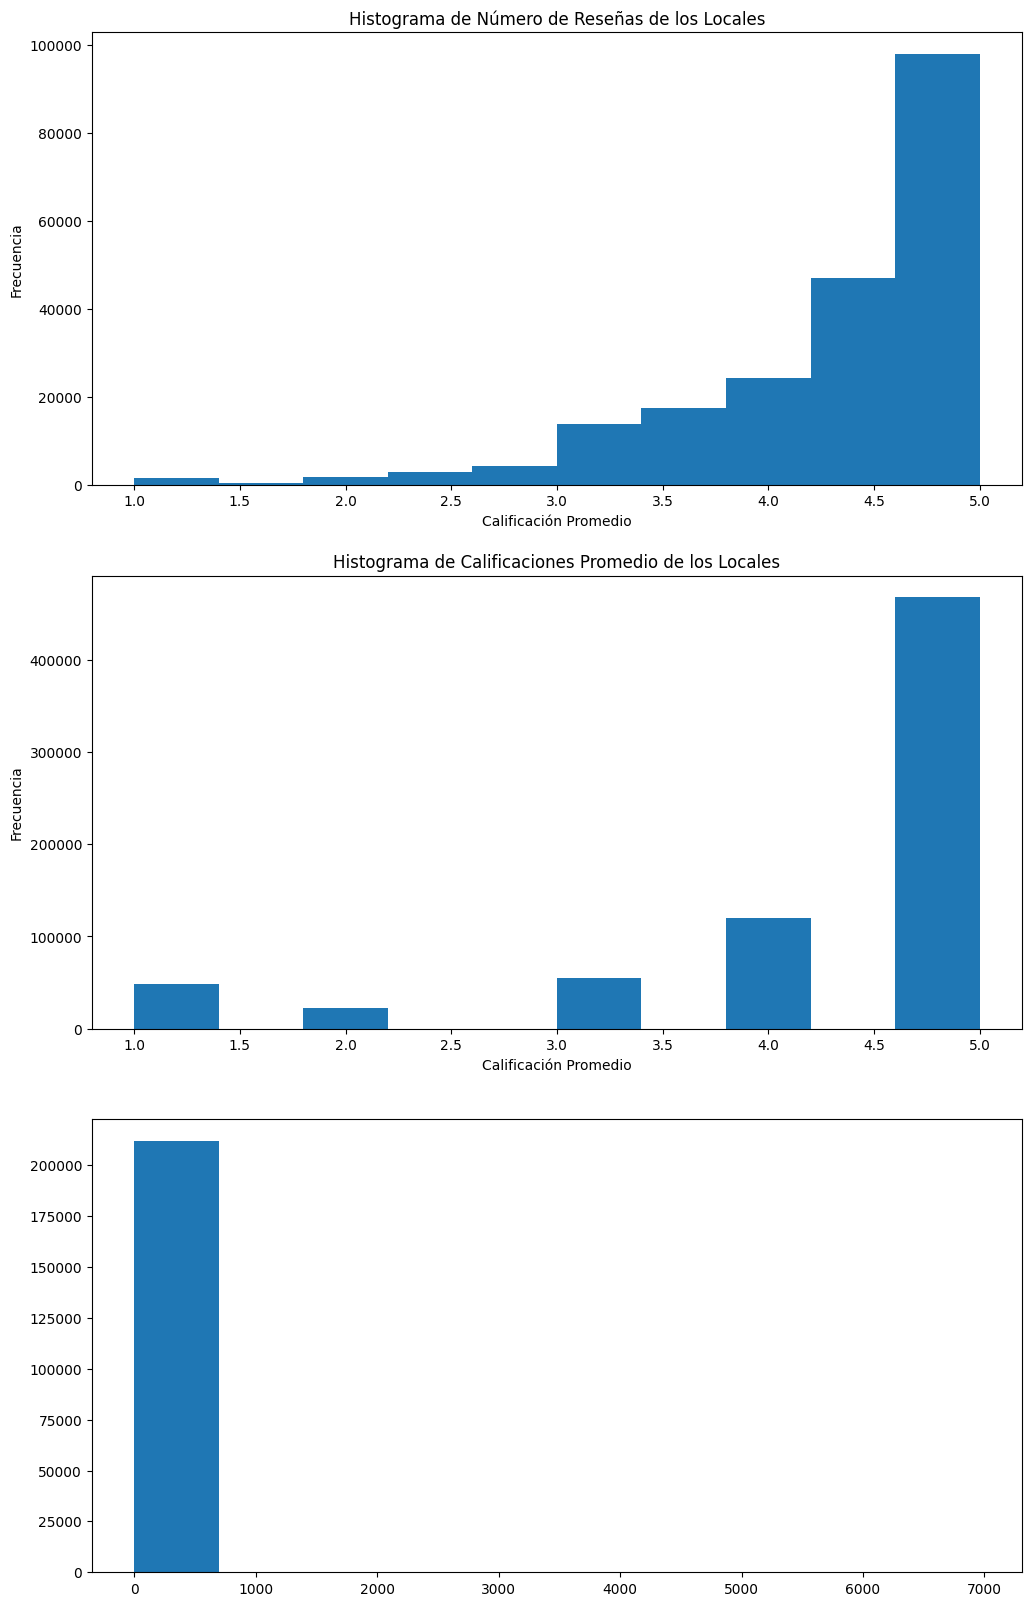

In [22]:
# HISTOGRAMA DE LA CANTIDAD DE CALIFICACIÓN QUE SE DA LOS RESTAURANTES
fig, axes = plt.subplots(3,1,figsize=(12,20))
axes[0].hist(df_metadata_num.avg_rating)
axes[0].set_title('Histograma de Calificaciones Promedio de los Locales')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_review_num.rating)
axes[1].set_title('Histograma de Calificaciones Promedio de los Locales')
axes[1].set_xlabel('Calificación Promedio')
axes[1].set_ylabel('Frecuencia')

axes[2].hist(df_metadata_num.num_of_reviews)
axes[0].set_title('Histograma de Número de Reseñas de los Locales')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

📚 Conclusiones:
- Se ve que hay una cantidad considerable de outliers estos se ven reflejados en las colas izquierdas de los histogramas de ratings de ambos dataset.

#### Análisis de variables categóricas

In [38]:
print(data_type_check(df_metadata_cat))
print(data_type_check(df_review_cat))


 Resumen del dataframe:

Dimensiones:  (212299, 4)
    columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0      name       100.0      0.0            0    object
1   address       100.0      0.0            0    object
2   gmap_id       100.0      0.0            0    object
3  category       100.0      0.0            0    object
None

 Resumen del dataframe:

Dimensiones:  (712500, 3)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0     name       100.0      0.0            0    object
1  gmap_id       100.0      0.0            0    object
2    month       100.0      0.0            0    object
None



 Resumen del dataframe:

Dimensiones:  (712500, 3)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0     name       100.0      0.0            0    object
1  gmap_id       100.0      0.0            0    object
2    month       100.0      0.0            0    object


#### Outliers

In [24]:
# SE ENCUENTRA LOS OUTLIERS POR MEDIO DEL RANGO INTERCUARTILICO
print(calculate_iqr_outliers(df_metadata_num.avg_rating))
print(calculate_iqr_outliers(df_metadata_num.num_of_reviews))
print(calculate_iqr_outliers(df_review_num.rating))

(2.8000000000000003, 6.0)
(-40.5, 83.5)
(2.5, 6.5)


In [25]:
# GUARDAMOS EN LOS MINIMOS Y MAXIMOS OUTLIERS
min_meta_rating,max_meta_rating = calculate_iqr_outliers(df_metadata_num.avg_rating)
min_meta_review,max_meta_review = calculate_iqr_outliers(df_metadata_num.num_of_reviews)
min_review_rating,max_review_rating = calculate_iqr_outliers(df_review_num.rating)

In [26]:
# FILTRADO 1
filtro_1 = (df_metadata_num.avg_rating >= min_meta_rating)&(df_metadata_num.avg_rating <= max_meta_rating)
df_metadata_num_fil = df_metadata_num[filtro_1]

# FILTRADO 2
filtro_2 = (df_metadata_num_fil.num_of_reviews >= min_meta_review)&(df_metadata_num_fil.num_of_reviews <= max_meta_review)
df_metadata_num_fil = df_metadata_num_fil[filtro_2]

# FILTRADO 3
filtro_3 = (df_review_num.rating >= min_review_rating)&(df_review_num.rating <= max_review_rating)
df_review_num_fil = df_review_num[filtro_3]

In [27]:
df_review_num_fil

,user_id,rating,year,day
0,1.145803e+20,5,2018,3
1,1.077641e+20,5,2021,2
2,1.003756e+20,5,2020,10
3,1.102839e+20,5,2018,22
4,1.156291e+20,5,2019,25
...,...,...,...,...
712495,1.079692e+20,4,2019,30
712496,1.022552e+20,5,2019,4
712497,1.062630e+20,4,2019,24
712498,1.112502e+20,5,2020,8


In [28]:
df_metadata_num_fil

,latitude,longitude,avg_rating,num_of_reviews
0,41.839291,-88.100503,5.0,1
1,26.962494,-82.075552,5.0,1
2,34.450636,-85.714130,4.8,58
3,43.622089,-72.953674,4.4,26
5,42.205127,-74.212669,5.0,2
...,...,...,...,...
219996,38.408448,-121.447597,4.3,13
219997,32.462258,-92.160431,4.0,3
219998,35.557125,-82.535757,4.6,14
219999,42.229032,-87.940695,5.0,8


### Gráficos para el análisis

In [29]:
# SE ENCUENTRA LA FRECUENCIA DE LAS CALIFICACIONES
freq_rates = df_metadata_num.avg_rating.value_counts().reset_index()
freq_rates.columns = ['Ratings', 'Frequency']

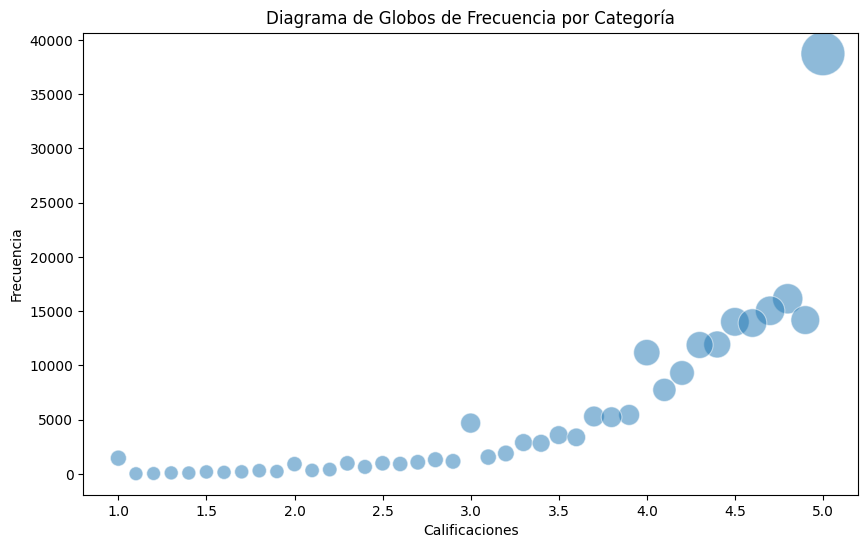

In [30]:
# GRAFICO DE BURBUJAS DE LAS CALIFICACIONES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=freq_rates, x='Ratings', y='Frequency', size='Frequency', sizes=(100, 1000), alpha=0.5, legend=False)
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Globos de Frecuencia por Categoría')
plt.show()

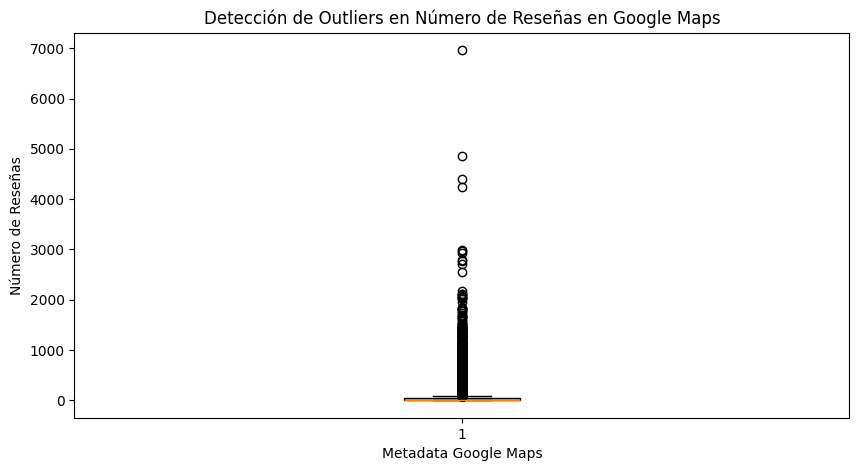

In [31]:
# GRAFICO DE CAJA Y BIGOTES PARA EL NUMERO DE REVIEWS
plt.figure(figsize=(10, 5))
plt.boxplot(df_metadata_num['num_of_reviews'], patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.xlabel('Metadata Google Maps')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas en Google Maps')
plt.show()

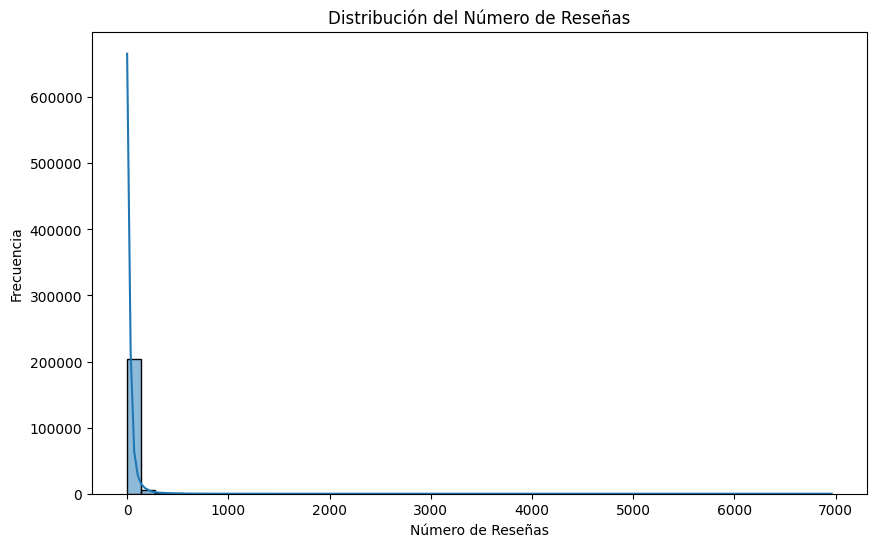

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df_metadata_num['num_of_reviews'], bins=50, kde=True)
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Reseñas')
plt.show()

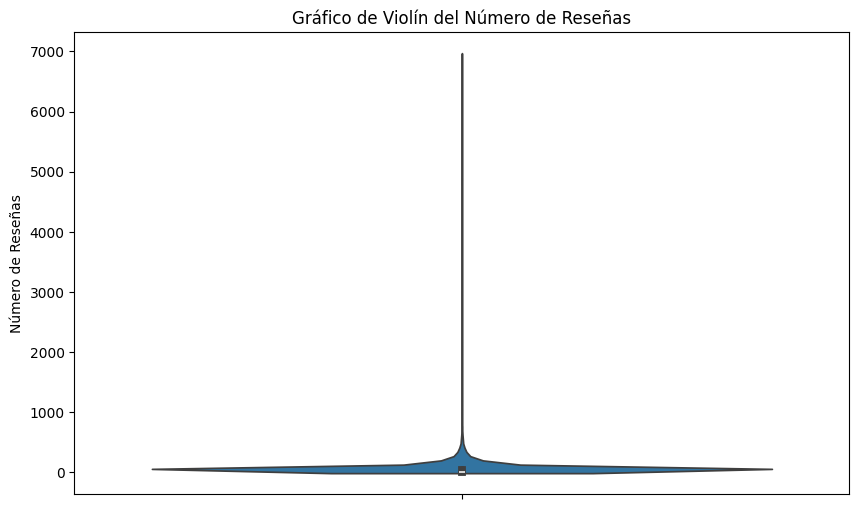

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df_metadata_num['num_of_reviews'])
plt.title('Gráfico de Violín del Número de Reseñas')
plt.ylabel('Número de Reseñas')
plt.show()

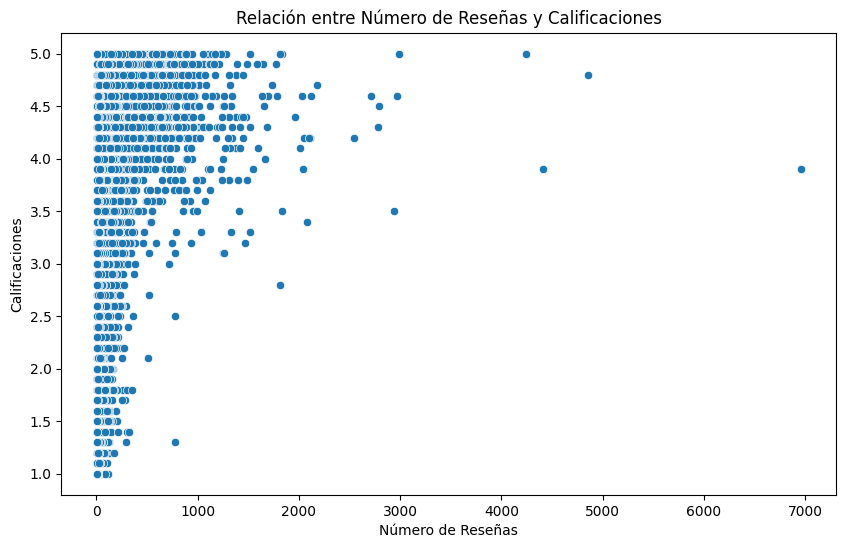

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_of_reviews', y='avg_rating', data=df_metadata_num)
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificaciones')
plt.title('Relación entre Número de Reseñas y Calificaciones')
plt.show()

In [35]:
# SE ENCUENTRA LA FRECUENCIA DE LAS CALIFICACIONES
freq_rates = df_metadata_num.avg_rating.value_counts().reset_index()
freq_rates.columns = ['Ratings', 'Frequency']

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_metadata_num['num_of_reviews'].value_counts(), x='Ratings', y='Frequency', size='Frequency', sizes=(100, 1000), alpha=0.5, legend=False)
sns.scatterplot(df_metadata_num['num_of_reviews'], patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.xlabel('Metadata Google Maps')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas en Google Maps')
plt.show()

SyntaxError: invalid syntax (2108026767.py, line 2)

#### Variables categóricas

In [ ]:
df_metadata_cat.name.value_counts()

name
Subway                          552
United States Postal Service    524
Shell                           472
U-Haul Neighborhood Dealer      392
Redbox                          370
                               ... 
Dennis Meighan, DO                1
Dodge Avenue K9's & Training      1
Us Donuts                         1
Monteith Branch                   1
Mr Falafel Plus                   1
Name: count, Length: 183109, dtype: int64

### Exportación de datos

In [ ]:
# EXPORTACIÓN DEL DATASET SIN LOS DATOS NULOS
